## Importing packages

In [1]:
# EDA packages
import pandas as pd
import numpy as np

In [2]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

<ipython-input-2-79524902a369>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
# load our dataset
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# To check for any missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [9]:
df.shape

(150, 5)

In [10]:
# Species distribution
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


## EDA 

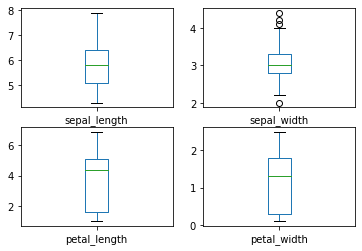

In [11]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

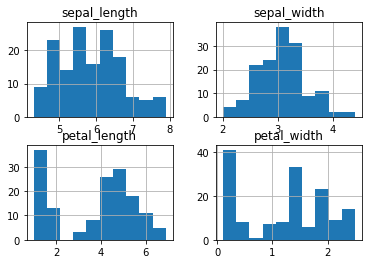

In [12]:
# histograms using pandas plot
df.hist()
plt.show()

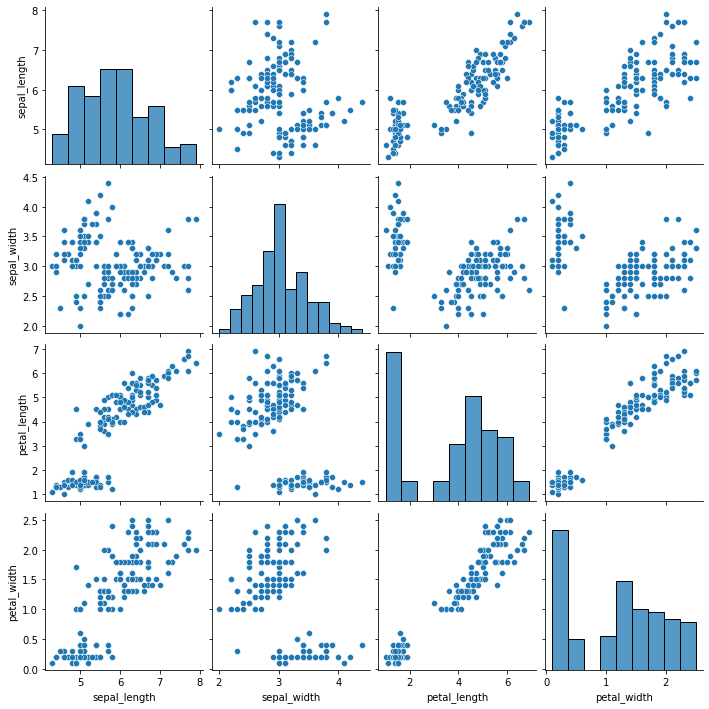

In [13]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df)

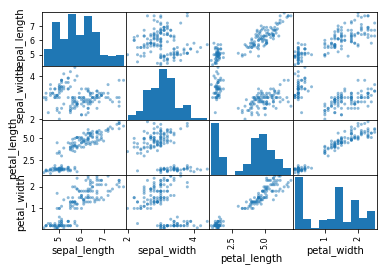

In [14]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

<AxesSubplot:>

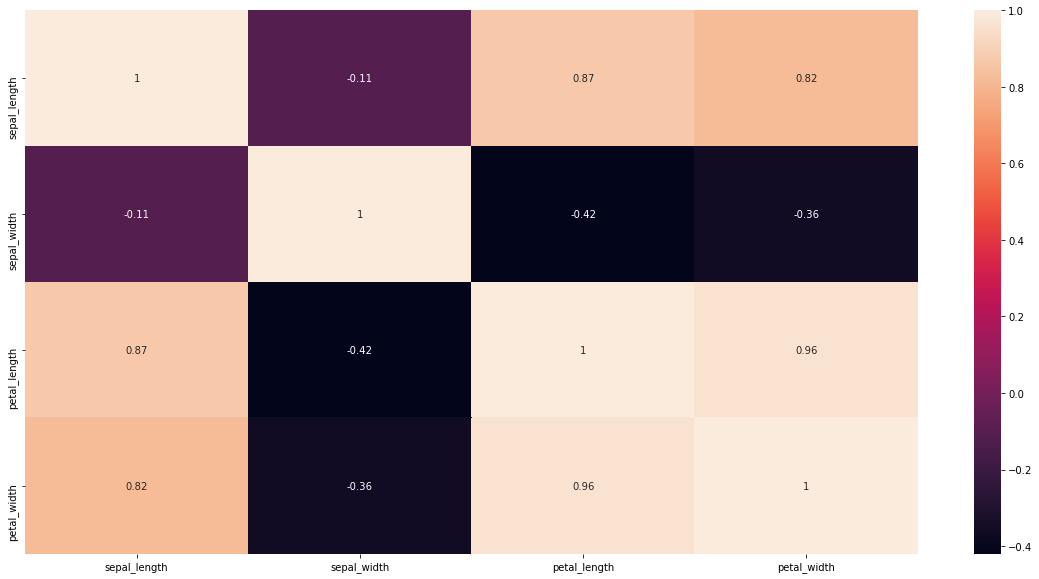

In [15]:
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(), annot =True)

C:\Users\starinfo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

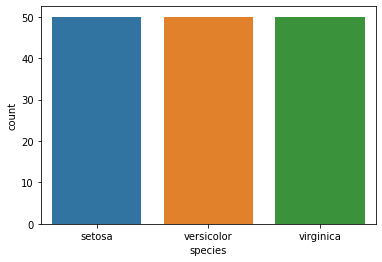

In [16]:
sns.countplot(df['species'])

## Machine Learning Models

In [17]:
# Split-out validation dataset
array = df.values
x = array[:,0:4]
y = array[:,4]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [21]:
x_train

array([[5.1, 3.4, 1.5, 0.2],
       [5.5, 2.3, 4.0, 1.3],
       [5.7, 2.6, 3.5, 1.0],
       [5.4, 3.7, 1.5, 0.2],
       [7.0, 3.2, 4.7, 1.4],
       [5.0, 3.3, 1.4, 0.2],
       [5.0, 3.5, 1.6, 0.6],
       [7.7, 3.0, 6.1, 2.3],
       [5.0, 3.5, 1.3, 0.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [5.9, 3.0, 4.2, 1.5],
       [6.7, 3.3, 5.7, 2.1],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.3, 2.5, 5.0, 1.9],
       [5.0, 3.2, 1.2, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.7, 1.0],
       [5.1, 2.5, 3.0, 1.1],
       [5.9, 3.0, 5.1, 1.8],
       [5.0, 2.0, 3.5, 1.0],
       [6.5, 3.0, 5.2, 2.0],
       [6.5, 3.0, 5.8, 2.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3

In [22]:
y_train

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa

In [23]:
x_test

array([[5.8, 2.7, 3.9, 1.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [4.4, 3.2, 1.3, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [4.9, 2.4, 3.3, 1.0],
       [4.9, 3.0, 1.4, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [5.0, 3.0, 1.6, 0.2],
       [5.4, 3.0, 4.5, 1.5],
       [5.6, 3.0, 4.5, 1.5],
       [6.3, 2.8, 5.1, 1.5],
       [7.1, 3.0, 5.9, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [5.0, 3.4, 1.6, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [6.3, 2.7, 4.9, 1.8],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.7, 1.5, 0.4],
       [4.8, 3.0, 1.4, 0.1],
       [6.1, 2.8, 4.0, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.3, 3.7, 1.5, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [5.6, 3.0, 4.1, 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [6.4, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.2]], dtype=object)

In [24]:
y_test

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

## Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [26]:
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)

C:\Users\starinfo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [27]:
y_predict =logistic_model.predict(x_test)
y_predict

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [28]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

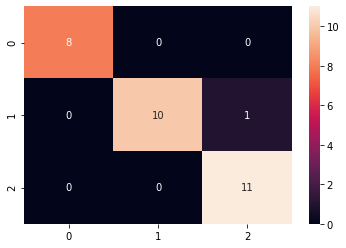

In [29]:
sns.heatmap(cm ,annot=True)

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [31]:
print("accuracy :" , logistic_model.score(x_test,y_test))

accuracy : 0.9666666666666667


In [32]:
# Individual Prediction
mysample = np.array([4.9,3.0,1.4,0.2])
ex1 = mysample.reshape(1,-1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
logistic_model.predict(ex1)

array(['setosa'], dtype=object)

In [35]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.externals import joblib
joblib.dump(logistic_model, 'logit_model_iris.pkl') 

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\starinfo\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logistic_model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)

In [ ]:
ex2 = np.array([6.2,3.4,5.4,2.3]).reshape(1,-1)

In [ ]:
logistic_model.predict(ex2)

## KNN, Descision Tree and SVM models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [ ]:
# Fit the model
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("accuracy :" , knn.score(x_test,y_test))

In [ ]:
k = 5

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

yhat6 = neigh6.predict(x_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
k = 8

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

yhat6 = neigh6.predict(x_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

In [ ]:
# save the model to disk
joblib.dump(knn, 'knn_model_iris.pkl') 

In [ ]:
dtree.fit(x_train, y_train)
print("accuracy :" , dtree.score(x_test,y_test))

In [ ]:
# save the model to disk
joblib.dump(dtree, 'dtree_model_iris.pkl') 

In [ ]:
svm.fit(x_train, y_train)
print("accuracy :" , svm.score(x_test,y_test))

In [ ]:
# save the model to disk
joblib.dump(svm, 'svm_model_iris.pkl') 

In [37]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
